In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [12]:
df1.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [13]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
df1.dropna(inplace=True)

In [18]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df1["size"].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [21]:
#spliting the value and taking the first value and converting it into int
df1['bhk']=df1['size'].apply(lambda x: int(x.split(" ")[0]))

In [22]:
df1["bhk"].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [23]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
df1[df1['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [31]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
#identifying the range values in "total_sqft" like '1133 - 1384'

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [35]:
df1[~df1["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [45]:
# Taking the mean of the range values in "total_sqft" 

def convert_ranget_sqft(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1])/2)
    try:
         return float(x)
    except:
         return None

In [46]:
df1["total_sqft"]=df1["total_sqft"].apply(convert_ranget_sqft)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [86]:
df2=df1.copy()

In [87]:
df2["price_per_sqft"]=df2['price']*500000/df2["total_sqft"]

In [88]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,18499.053030
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,23076.923077
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,21527.777778
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,31229.454306
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,21250.000000


In [89]:
loc_stats=df2["location"].value_counts().to_frame()

In [90]:
loc_stats

,location
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
Vidyapeeta,1
Maruthi Extension,1
Okalipura,1
Old Town,1


In [91]:
loc_stats.sort_values(by="location")

,location
Abshot Layout,1
"Yelahanka,MVIT college",1
Pillahalli,1
Rajarajesheari nagar,1
Asthagrama Layout,1
...,...
Thanisandra,233
Kanakpura Road,266
Electronic City,302
Sarjapur Road,392


In [92]:
loc_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, Whitefield to Abshot Layout
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   location  1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [93]:
fil=(loc_stats["location"]<=10)

In [96]:
stats=loc_stats[fil]

In [99]:
stats

,location
Dairy Circle,10
Kalkere,10
Dodsworth Layout,10
Sadashiva Nagar,10
Naganathapura,10
...,...
Vidyapeeta,1
Maruthi Extension,1
Okalipura,1
Old Town,1


In [100]:
df2.location=df2.location.apply(lambda x: "other" if x in stats["location"] else x )

In [101]:
df2["location"].value_counts()

other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [103]:
#Detecting the outliers
df2[(df2.total_sqft/df2.bhk)<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,181372.549020
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,166666.666667
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,53304.904051
68,other,8 Bedroom,1350.0,7.0,85.0,8,31481.481481
70,other,3 Bedroom,500.0,3.0,100.0,3,100000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,23913.043478
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,112676.056338
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,41666.666667
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,60526.315789
149,other,6 Bedroom,1034.0,5.0,185.0,6,89458.413926


In [106]:
df3= df2[~((df2.total_sqft/df2.bhk)<300)]

In [107]:
df3.shape

(12502, 7)

In [108]:
df3.price_per_sqft.describe()

count     12456.000000
mean      31451.499915
std       20878.096057
min        1339.149066
25%       20933.629220
50%       26408.450704
75%       34523.260073
max      882352.941176
Name: price_per_sqft, dtype: float64

In [109]:
#function to remove outliers
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[((subdf.price_per_sqft)>(m-st)) & ((subdf.price_per_sqft)<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [110]:
df4=remove_outliers(df3)

In [111]:
df4.shape

(10234, 7)

In [112]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,17600.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,16000.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,34583.333333
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,17094.017094
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,22807.017544


In [115]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label="2BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label="3BHK",s=50)
    plt.xlabel("total_sqft")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show

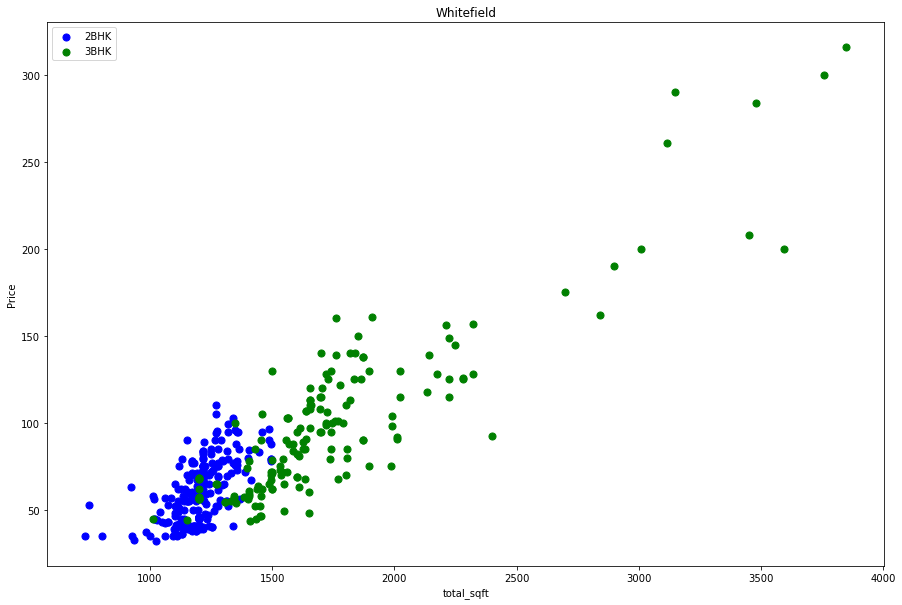

In [117]:
plot_scatter_chart(df4,"Whitefield")

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [118]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df5 = remove_bhk_outliers(df4)
df5.shape

(7342, 7)

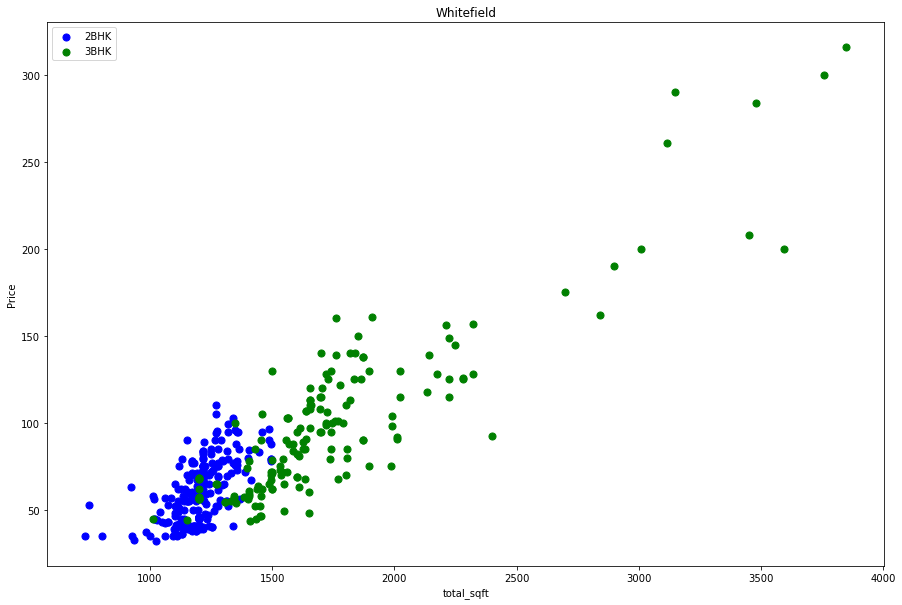

In [119]:
plot_scatter_chart(df4,"Whitefield")

Text(0, 0.5, 'Count')

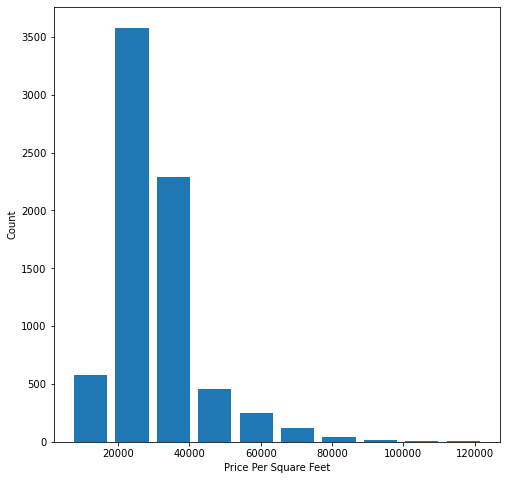

In [120]:
import matplotlib
plt.figure(figsize=(8,8))
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

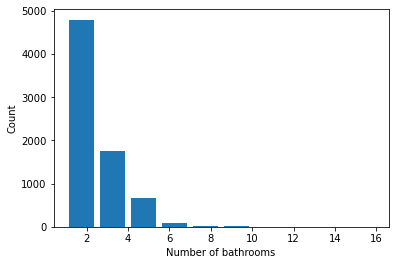

In [121]:
# Outlier Removal Using Bathrooms Feature

plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [122]:
df5[df5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5267,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,20000.00000
8471,other,10 BHK,12000.0,12.0,525.0,10,21875.00000
8560,other,16 BHK,10000.0,16.0,550.0,16,27500.00000
9299,other,11 BHK,6000.0,12.0,150.0,11,12500.00000
9631,other,13 BHK,5425.0,13.0,275.0,13,25345.62212


In [124]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1636,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,16260.162602
5228,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,32142.857143
6696,Thanisandra,3 BHK,1806.0,6.0,116.0,3,32115.171650
8395,other,6 BHK,11338.0,9.0,1000.0,6,44099.488446


In [125]:
df6 = df5[df5.bath<df5.bhk+2]
df6.shape

(7268, 7)

In [126]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,16000.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,34583.333333
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,17094.017094
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,22807.017544
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,22703.273495


In [127]:
df7=df6.drop(['size','price_per_sqft'],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [128]:
#Using one hot encoding for location
dummies=pd.get_dummies(df7.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
dummies.drop(["other"],axis=1)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df8=pd.concat([df7,dummies],axis=1)

In [131]:
df8.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df9=df8.drop(["location"],axis=1)

In [133]:
df9.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
X=df9.drop(["price"],axis=1)
y=df9["price"]

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [139]:
from sklearn.linear_model import LinearRegression
rl_model=LinearRegression()
rl_model.fit(X_train,y_train)


LinearRegression()

In [140]:
rl_model.score(X_test,y_test)

0.8447098016642616

In [143]:
#Verifying the accuracy of our model using K Fold Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [146]:
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83588212, 0.87564104, 0.84076744, 0.81291672, 0.77245699])

 Finding the best model using GridSearchCV

In [147]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.827555,{'normalize': True}
1,lasso,0.704153,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.773374,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [149]:
#Export the tested model to a pickle file

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(rl_model,f)

In [150]:
# Export location and column information to a file that will be useful later on in our prediction application

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))